<a href="https://colab.research.google.com/github/samuelhtampubolon/SDPM2025/blob/main/Classification_Error_Metrics_and_Performance_Using_Scikit_Learn_with_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import numpy as np

# Load built-in iris dataset (binary classification: setosa vs others)
iris = load_iris()
X = iris.data
y = (iris.target == 0).astype(int)  # Binary: 1 for setosa, 0 for others

In [2]:
# PENTING!!! Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Prints
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


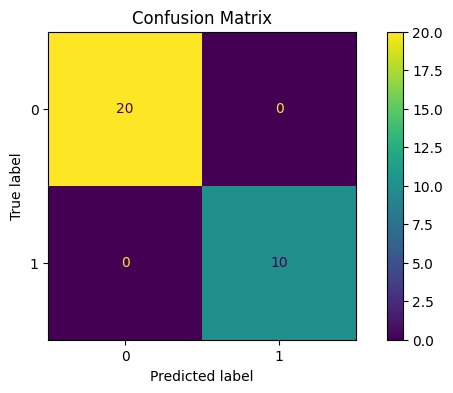

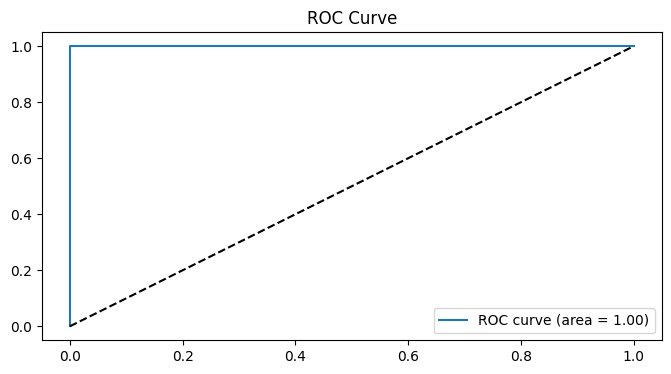

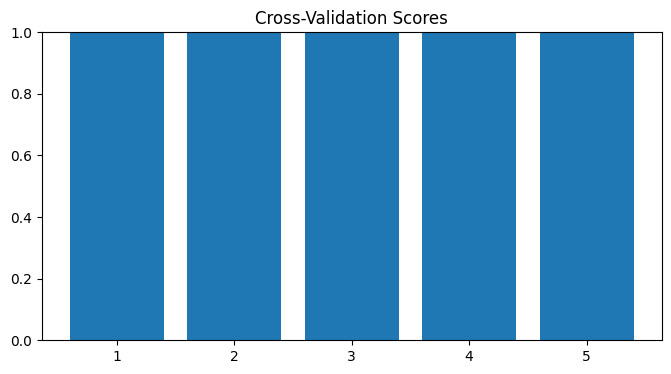

In [4]:
# Visual 1: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(8, 4))
disp.plot(ax=ax)
plt.title('Confusion Matrix')
plt.show()

# Visual 2: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Visual 3: Cross-Validation Scores Bar Plot
cv_scores = cross_val_score(model, X, y, cv=5)
plt.figure(figsize=(8, 4))
plt.bar(range(1, 6), cv_scores)
plt.title('Cross-Validation Scores')
plt.ylim(0, 1)
plt.show()